Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.711754940
Epoch: 0002, Cost: 1.096269267
Epoch: 0003, Cost: 0.871770619
Epoch: 0004, Cost: 0.760479780
Epoch: 0005, Cost: nan
Epoch: 0006, Cost: nan
Epoch: 0007, Cost: nan
Epoch: 0008, Cost: nan
Epoch: 0009, Cost: nan
Epoch: 0010, Cost: nan
Epoch: 0011, Cost: nan
Epoch: 0012, Cost: nan
Epoch: 0013, Cost: nan
Epoch: 0014, Cost: nan
Epoch: 0015, Cost: nan
Epoch: 0016, Cost: nan
Epoch: 0017, Cost: nan
Epoch: 0018, Cost: nan
Epoch: 0019, Cost: nan
Epoch: 0020, Cost: nan
Epoch: 0021, Cost: nan
Epoch: 0022, Cost: nan
Epoch: 0023, Cost: nan
Epoch: 0024, Cost: nan
Epoch: 0025, Cost: nan
Epoch: 0026, Cost: nan
Epoch: 0027, Cost: nan
Epoch: 0028, Cost: nan
Epoch: 0029, Cost: nan
Epoch: 0030, Cost: nan
Learning finished
Accuracy:  0.098
Label:  [4]
Prediction:  [0]


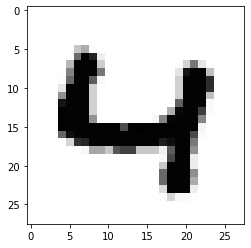

In [4]:
# Mnist Practice
import tensorflow as tf
import matplotlib.pyplot as plt
import random 

tf.set_random_seed(777)

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data .read_data_sets("MNIST_data/",one_hot = True)

nb_classes = 10

X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,nb_classes])

W = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples/batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for i in range(num_iterations):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train,cost],feed_dict={X:batch_xs,Y:batch_ys})
            avg_cost += cost_val/num_iterations
        
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
        
    print("Learning finished")
    
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()
    